In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle

df = pd.read_excel("panel_data.xlsx")

speciality = None  # Injected by papermill
region = None      # Injected by papermill

In [ ]:
#4
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NPI                50000 non-null  int64 
 1   State              50000 non-null  object
 2   Usage Time (mins)  50000 non-null  int64 
 3   Region             50000 non-null  object
 4   Speciality         50000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
#5
df['Speciality'].value_counts()

Speciality
Cardiology          7243
Orthopedics         7190
General Practice    7161
Pediatrics          7154
Neurology           7121
Radiology           7067
Oncology            7064
Name: count, dtype: int64

In [ ]:
#6
df['Region'].value_counts()

Region
Midwest      12601
West         12523
Northeast    12500
South        12376
Name: count, dtype: int64

In [ ]:
#7
df['State'].value_counts()

State
NY    5123
FL    5112
CA    5029
OH    5024
GA    5000
IL    4975
TX    4956
PA    4945
NC    4922
MI    4914
Name: count, dtype: int64

In [ ]:
#8
speciality_df = df.loc[df["Speciality"] == speciality]
speciality_percent = (len(speciality_df) / len(df)) * 100 if len(df) > 0 else 0
if speciality_df.empty:
    print(f"Warning: No data found for speciality '{speciality}'")
speciality_percent

In [ ]:
#10
speciality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7243 entries, 0 to 49992
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NPI                7243 non-null   int64 
 1   State              7243 non-null   object
 2   Usage Time (mins)  7243 non-null   int64 
 3   Region             7243 non-null   object
 4   Speciality         7243 non-null   object
dtypes: int64(2), object(3)
memory usage: 339.5+ KB


If region is not input

In [ ]:
# Cell #11: Get unique regions from speciality_df
regions = list(speciality_df["Region"].unique()) if not speciality_df.empty else [region if region != "All_Regions" else "All Regions"]

['Northeast', 'Midwest', 'West', 'South']

In [ ]:
# Cell #12: Create regions_df_list and region_names
regions_df_list = []
region_names = []
if not speciality_df.empty:
    if region == "All_Regions":
        for reg in regions:
            region_df = speciality_df.loc[speciality_df["Region"] == reg]
            if not region_df.empty:  # Only append non-empty DataFrames
                regions_df_list.append(region_df)
                region_names.append(reg)
    else:
        region_df = speciality_df.loc[speciality_df["Region"] == region]
        if not region_df.empty:
            regions_df_list.append(region_df)
            region_names.append(region)
else:
    # Handle empty speciality_df
    regions_df_list.append(pd.DataFrame(columns=speciality_df.columns))
    region_names.append(region if region != "All_Regions" else "All Regions")

In [ ]:
# Cell #13: Debug regions_df_list safely
if regions_df_list:
    for i, (region_df, reg_name) in enumerate(zip(regions_df_list, region_names)):
        if not region_df.empty:
            print(f"Region {reg_name} has {len(region_df)} NPIs")
        else:
            print(f"Region {reg_name} has no data")
else:
    print("No regions have data for the selected speciality")

,NPI,State,Usage Time (mins),Region,Speciality
6,1000000006,TX,47,Midwest,Cardiology
16,1000000016,GA,93,Midwest,Cardiology
30,1000000030,NY,28,Midwest,Cardiology
99,1000000099,IL,21,Midwest,Cardiology
163,1000000163,NC,33,Midwest,Cardiology
...,...,...,...,...,...
49885,1000049885,IL,117,Midwest,Cardiology
49891,1000049891,NC,11,Midwest,Cardiology
49932,1000049932,MI,67,Midwest,Cardiology
49941,1000049941,IL,48,Midwest,Cardiology


In [ ]:
# Cell #14: Compute region-wise percentages
region_wise_percent = []
if not speciality_df.empty and len(speciality_df) > 0:
    for dfs in regions_df_list:
        percent_speciality_wise = (len(dfs) / len(speciality_df)) * 100
        region_wise_percent.append(round(percent_speciality_wise, 1))
else:
    region_wise_percent = [0.0 for _ in region_names]

In [ ]:
#Cell #15: Generate region-specific plots with error handling and debugging
import os
if not speciality_df.empty:
    if region != "All_Regions":
        state_counts = speciality_df.groupby('State').size().reset_index(name='NPI_Count')
        plt.figure(figsize=(10, 6))
        try:
            sns.barplot(x='State', y='NPI_Count', data=state_counts)
            plt.title(f'Number of {speciality} NPIs by State in {region}')
            plt.xticks(rotation=45)
            plt.savefig('plots/npi_by_state_region.png')
            plt.close()
            print(f"Saved plots/npi_by_state_region.png")
        except Exception as e:
            print(f"Error generating npi_by_state_region.png: {str(e)}")

        if 'Usage Time (mins)' in speciality_df.columns:
            usage_by_state = speciality_df.groupby('State')['Usage Time (mins)'].mean().reset_index()
            plt.figure(figsize=(10, 6))
            try:
                sns.barplot(x='State', y='Usage Time (mins)', data=usage_by_state)
                plt.title(f'Average Usage Time for {speciality} by State in {region}')
                plt.xticks(rotation=45)
                plt.savefig('plots/usage_by_state_region.png')
                plt.close()
                print(f"Saved plots/usage_by_state_region.png")
            except Exception as e:
                print(f"Error generating usage_by_state_region.png: {str(e)}")

            # Moved from Cell #29: Distribution of usage time for the specialty in the region
            plt.figure(figsize=(10, 6))
            try:
                sns.histplot(data=speciality_df, x='Usage Time (mins)', kde=True, bins=15)
                plt.title(f'Distribution of Usage Time for {speciality} in {region}')
                plt.xlabel('Usage Time (mins)')
                plt.ylabel('Frequency')
                plt.axvline(x=speciality_df['Usage Time (mins)'].mean(), color='r', linestyle='--', 
                           label=f'Mean: {speciality_df["Usage Time (mins)"].mean():.2f} mins')
                plt.axvline(x=speciality_df['Usage Time (mins)'].median(), color='g', linestyle='--', 
                           label=f'Median: {speciality_df["Usage Time (mins)"].median():.2f} mins')
                plt.legend()
                plt.tight_layout()
                plt.savefig('plots/usage_distribution_region.png')
                plt.close()
                print(f"Saved plots/usage_distribution_region.png")
            except Exception as e:
                print(f"Error generating usage_distribution_region.png: {str(e)}")

            plt.figure(figsize=(8, 8))
            try:
                plt.pie(state_counts['NPI_Count'], labels=state_counts['State'], autopct='%1.1f%%')
                plt.title(f'Distribution of {speciality} NPIs by State in {region}')
                plt.savefig('plots/state_pie_region.png')
                plt.close()
                print(f"Saved plots/state_pie_region.png")
            except Exception as e:
                print(f"Error generating state_pie_region.png: {str(e)}")

            top_npis = speciality_df.nlargest(10, 'Usage Time (mins)')
            plt.figure(figsize=(10, 6))
            try:
                sns.barplot(x='NPI', y='Usage Time (mins)', data=top_npis)
                plt.title(f'Top 10 {speciality} NPIs in {region} by Usage Time')
                plt.xticks(rotation=45)
                plt.savefig('plots/top_npis_region.png')
                plt.close()
                print(f"Saved plots/top_npis_region.png")
            except Exception as e:
                print(f"Error generating top_npis_region.png: {str(e)}")

            thresholds = [10, 20, 30]
            usage_percentages = [(speciality_df['Usage Time (mins)'] > t).mean() * 100 for t in thresholds]
            plt.figure(figsize=(10, 6))
            try:
                plt.plot(thresholds, usage_percentages, marker='o')
                plt.title(f'Percentage of {speciality} NPIs in {region} Above Usage Time Thresholds')
                plt.xlabel('Threshold (mins)')
                plt.ylabel('Percentage (%)')
                plt.savefig('plots/usage_thresholds_region.png')
                plt.close()
                print(f"Saved plots/usage_thresholds_region.png")
            except Exception as e:
                print(f"Error generating usage_thresholds_region.png: {str(e)}")

25.320999585806987

visualizations

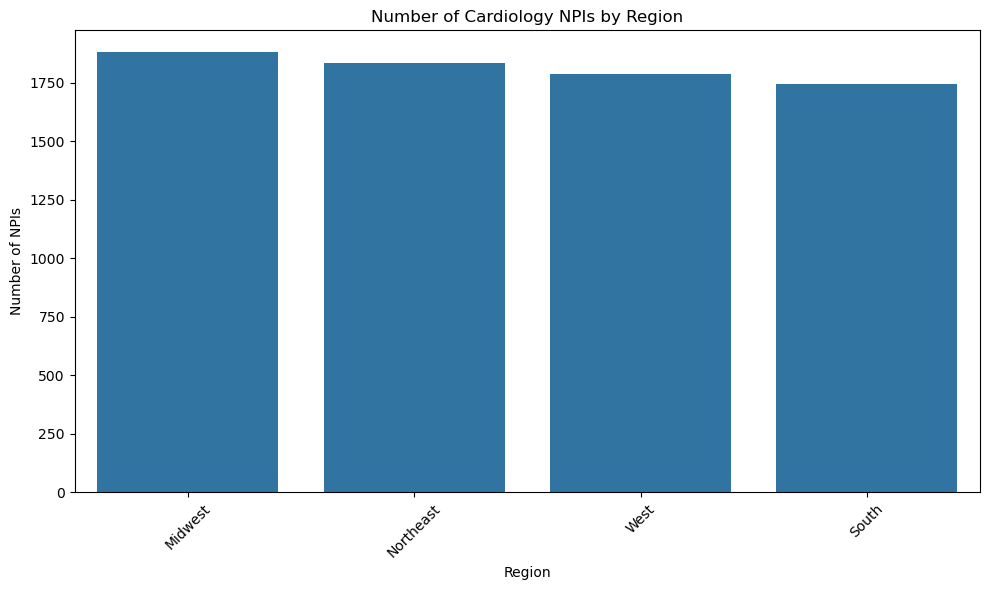

In [ ]:
#Cell #16
plt.figure(figsize=(10, 6))
region_counts = speciality_df['Region'].value_counts().sort_values(ascending=False)
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title(f'Number of {speciality} NPIs by Region')
plt.xlabel('Region')
plt.ylabel('Number of NPIs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/npi_by_region.png", bbox_inches="tight")
plt.close()

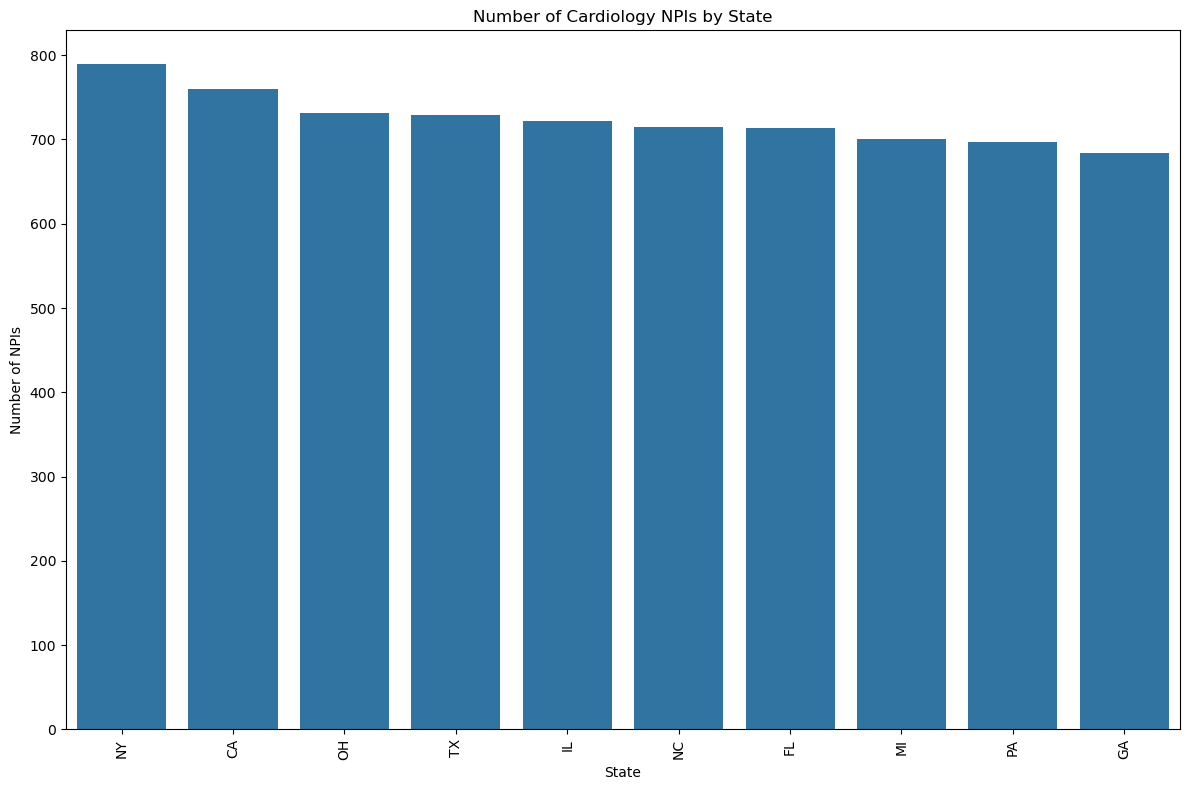

In [ ]:
# Cell #17
plt.figure(figsize=(12, 8))
state_counts = speciality_df['State'].value_counts().sort_values(ascending=False)
if len(state_counts) > 15:
    state_counts = state_counts.head(15)
    plt.title(f'Top 15 States with {speciality} NPIs')
else:
    plt.title(f'Number of {speciality} NPIs by State')
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel('State')
plt.ylabel('Number of NPIs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("plots/npi_by_state.png", bbox_inches="tight")
plt.close()

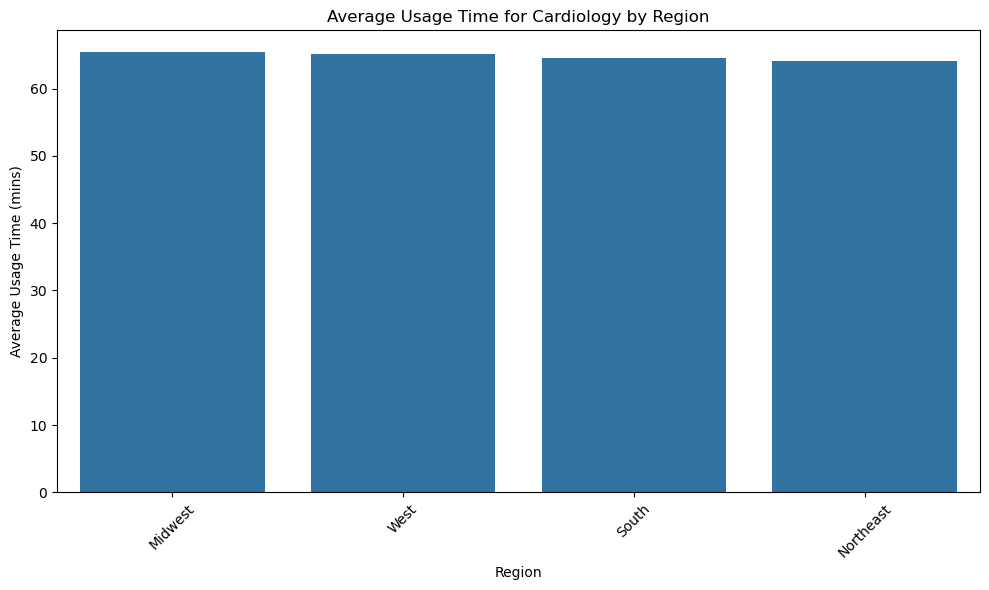

In [ ]:
# Cell #18: Average usage time by region
plt.figure(figsize=(10, 6))
avg_usage_by_region = speciality_df.groupby('Region')['Usage Time (mins)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_usage_by_region.index, y=avg_usage_by_region.values)
plt.title(f'Average Usage Time for {speciality} by Region')
plt.xlabel('Region')
plt.ylabel('Average Usage Time (mins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/usage_by_region.png", bbox_inches="tight")
plt.close()

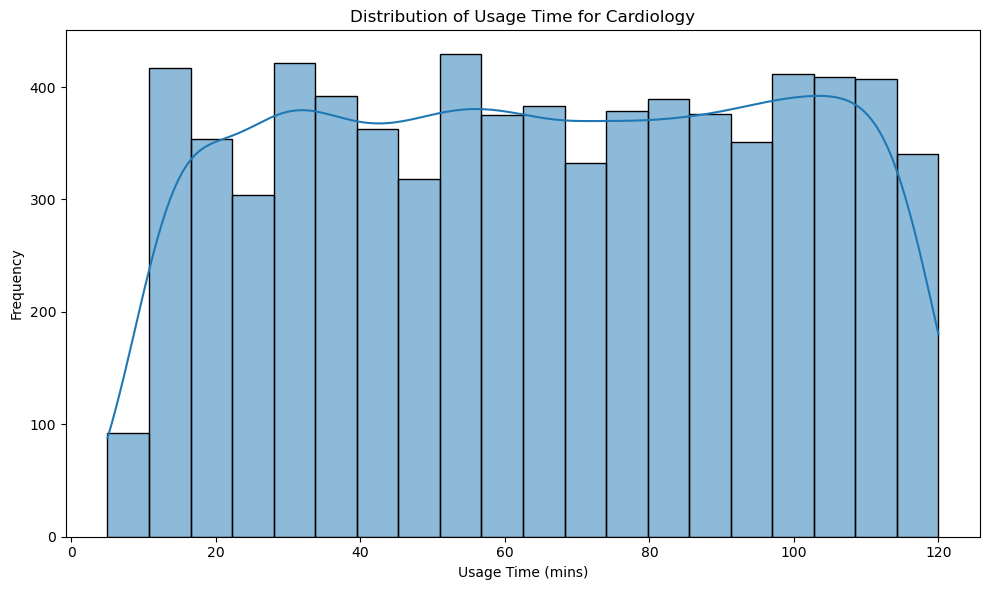

In [ ]:
# Cell #19: Distribution of usage time
plt.figure(figsize=(10, 6))
sns.histplot(speciality_df['Usage Time (mins)'], kde=True, bins=20)
plt.title(f'Distribution of Usage Time for {speciality}')
plt.xlabel('Usage Time (mins)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("plots/usage_distribution.png", bbox_inches="tight")
plt.close()

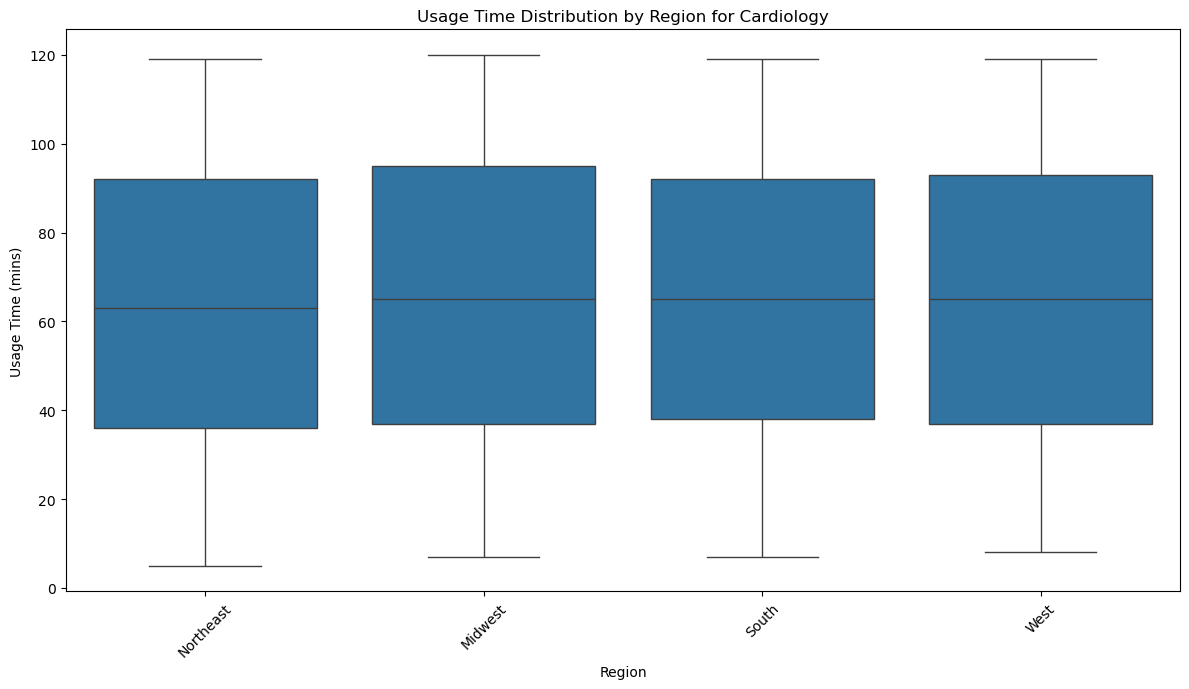

In [ ]:
#Cell #20: Box plot of usage time by region
plt.figure(figsize=(12, 7))
sns.boxplot(x='Region', y='Usage Time (mins)', data=speciality_df)
plt.title(f'Usage Time Distribution by Region for {speciality}')
plt.xlabel('Region')
plt.ylabel('Usage Time (mins)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/usage_boxplot.png", bbox_inches="tight")
plt.close()

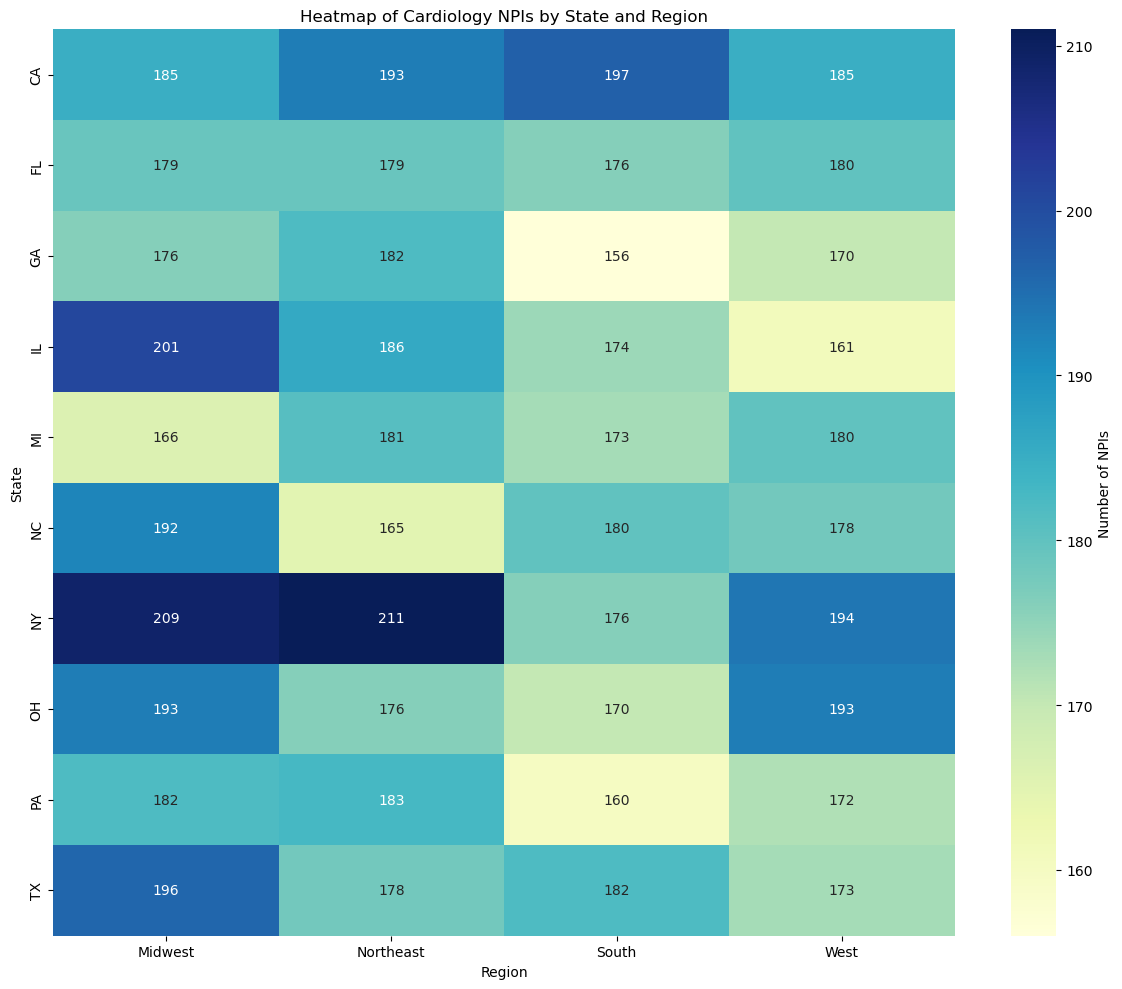

In [ ]:
# Cell #21: Heatmap of NPI count by state and region
pivot_table = pd.crosstab(speciality_df['State'], speciality_df['Region'])
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Number of NPIs'})
plt.title(f'Heatmap of {speciality} NPIs by State and Region')
plt.tight_layout()
plt.savefig("plots/npi_heatmap.png", bbox_inches="tight")
plt.close()

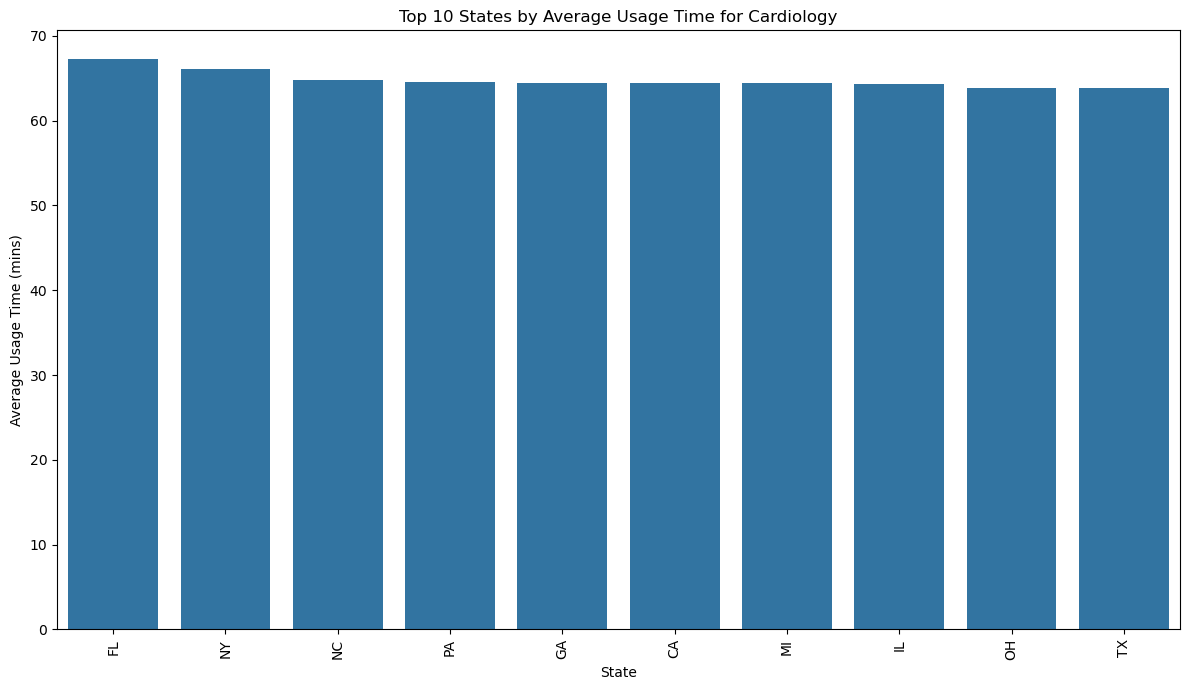

In [ ]:
# Cell #22: Top 10 states by average usage time
state_avg_usage = speciality_df.groupby('State')['Usage Time (mins)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=state_avg_usage.index, y=state_avg_usage.values)
plt.title(f'Top 10 States by Average Usage Time for {speciality}')
plt.xlabel('State')
plt.ylabel('Average Usage Time (mins)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("plots/top_states_usage.png", bbox_inches="tight")
plt.close()

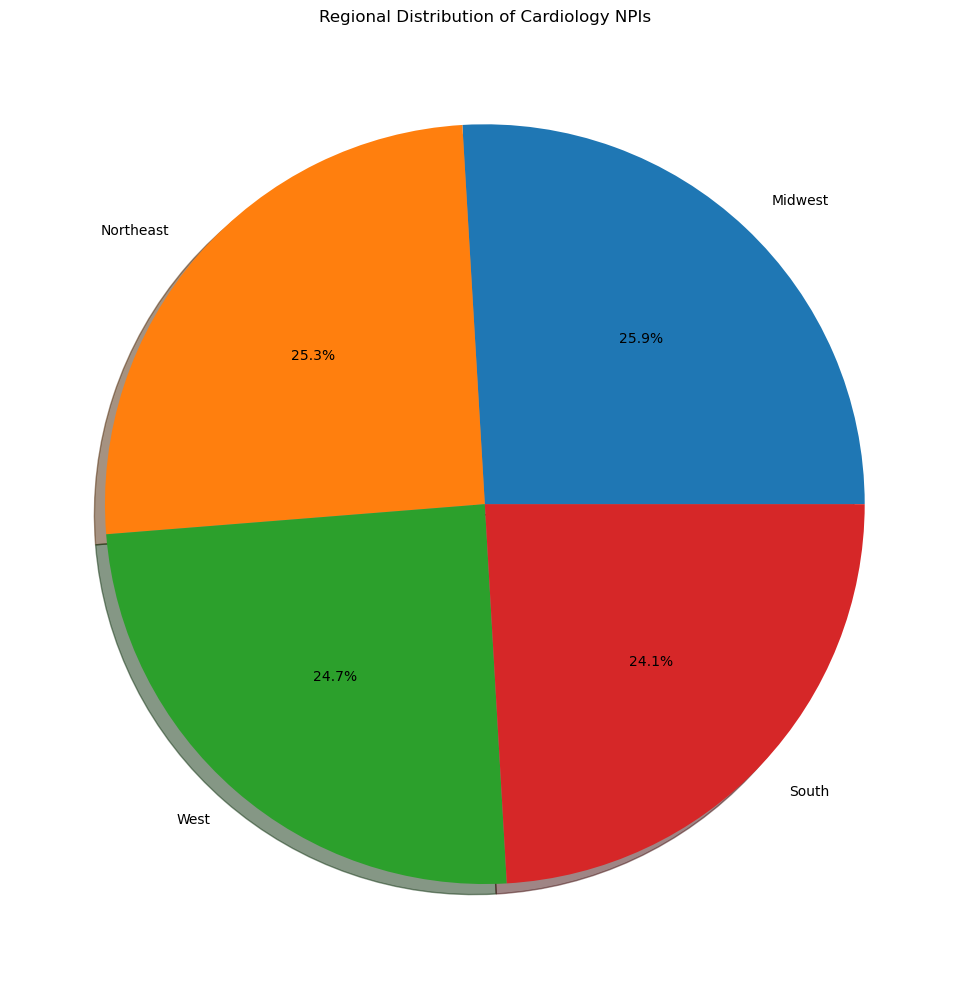

In [ ]:
# Cell #23: Pie chart of regional distribution
plt.figure(figsize=(10, 10))
speciality_df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title(f'Regional Distribution of {speciality} NPIs')
plt.ylabel('')
plt.tight_layout()
plt.savefig("plots/regional_pie.png", bbox_inches="tight")
plt.close()

In [ ]:
# Cell #24: Regional maps visualization (save as HTML)
def visualize_npi_map(df, speciality=None, region=None):
    # (Keep the function as provided, but modify to return figures and save HTML)
    if speciality:
        filtered_df = df[df['Speciality'] == speciality]
        title_suffix = f" for {speciality} Specialty"
    else:
        filtered_df = df
        title_suffix = " Across All Specialties"
    
    region_mapping = {
        'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
        'Midwest': ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS', 'Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
        'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX', 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
        'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI', 'Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
    }
    
    state_code_to_name = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
    }
    
    state_name_to_code = {v: k for k, v in state_code_to_name.items()}
    
    data_df = filtered_df.copy()
    
    if len(data_df) > 0 and len(data_df['State'].iloc[0]) > 2:
        data_df['StateCode'] = data_df['State'].map(lambda x: state_name_to_code.get(x, x))
    else:
        data_df['StateCode'] = data_df['State']
        data_df['StateName'] = data_df['State'].map(lambda x: state_code_to_name.get(x, x))
    
    def get_region(state_code):
        for r, states in region_mapping.items():
            if state_code in states:
                return r
        return "Unknown"
    
    data_df['Region'] = data_df['StateCode'].apply(get_region)
    
    if region and region != "All_Regions":
        data_df = data_df[data_df['Region'] == region]
        title_suffix += f" in {region} Region"
    
    state_counts = data_df.groupby('StateCode').size().reset_index(name='NPI_Count')
    state_counts['name'] = state_counts['StateCode'].map(lambda x: state_code_to_name.get(x, x))
    state_counts['Region'] = state_counts['StateCode'].apply(get_region)
    
    scope = 'usa'
    
    fig = px.choropleth(
        state_counts,
        locations='StateCode',
        locationmode='USA-states',
        color='NPI_Count',
        scope=scope,
        hover_name='name',
        hover_data=['Region', 'NPI_Count'],
        title=f'Distribution of NPIs Across US States{title_suffix}',
        color_continuous_scale='YlGnBu',
        labels={'NPI_Count': 'Number of NPIs'}
    )
    
    fig.update_layout(
        geo=dict(showlakes=True, lakecolor='rgb(255, 255, 255)'),
        margin={"r":0, "t":50, "l":0, "b":0},
        height=600
    )
    
    region_counts = data_df.groupby('Region').size().reset_index(name='NPI_Count')
    total_npis = region_counts['NPI_Count'].sum()
    region_counts['Percentage'] = (region_counts['NPI_Count'] / total_npis * 100).round(1)
    
    if region and region != "All_Regions":
        region_states = state_counts[state_counts['Region'] == region]
        region_fig = px.bar(
            region_states.sort_values('NPI_Count', ascending=False),
            x='name',
            y='NPI_Count',
            title=f'NPI Distribution by State in {region} Region{title_suffix}',
            labels={'NPI_Count': 'Number of NPIs', 'name': 'State'},
            color='NPI_Count',
            color_continuous_scale='YlGnBu'
        )
        region_fig.update_layout(height=400, xaxis={'categoryorder': 'total descending'})
    else:
        region_fig = px.bar(
            region_counts.sort_values('NPI_Count', ascending=False),
            x='Region',
            y='NPI_Count',
            text='Percentage',
            title=f'NPI Distribution by Region{title_suffix}',
            labels={'NPI_Count': 'Number of NPIs', 'Region': 'Region'},
            color='NPI_Count',
            color_continuous_scale='YlGnBu'
        )
        region_fig.update_traces(texttemplate='%{text}%', textposition='outside')
        region_fig.update_layout(height=400, xaxis={'categoryorder': 'total descending'})
    
    if region and region != "All_Regions":
        pie_fig = px.pie(
            state_counts[state_counts['Region'] == region],
            values='NPI_Count',
            names='name',
            title=f'Percentage Distribution of NPIs by State in {region} Region{title_suffix}',
            color_discrete_sequence=px.colors.sequential.YlGnBu
        )
    else:
        pie_fig = px.pie(
            region_counts,
            values='NPI_Count',
            names='Region',
            title=f'Percentage Distribution of NPIs by Region{title_suffix}',
            color_discrete_sequence=px.colors.sequential.YlGnBu
        )
    
    pie_fig.update_traces(textinfo='percent+label+value', hole=.3)
    
    usage_fig = None
    if 'Usage Time (mins)' in data_df.columns:
        if region and region != "All_Regions":
            usage_by_state = data_df.groupby(['StateCode', 'StateName'])['Usage Time (mins)'].mean().reset_index()
            usage_by_state['Usage Time (mins)'] = usage_by_state['Usage Time (mins)'].round(1)
            usage_fig = px.bar(
                usage_by_state.sort_values('Usage Time (mins)', ascending=False),
                x='StateName',
                y='Usage Time (mins)',
                title=f'Average Usage Time by State in {region} Region{title_suffix}',
                color='Usage Time (mins)',
                color_continuous_scale='YlGnBu'
            )
        else:
            usage_by_region = data_df.groupby('Region')['Usage Time (mins)'].mean().reset_index()
            usage_by_region['Usage Time (mins)'] = usage_by_region['Usage Time (mins)'].round(1)
            usage_fig = px.bar(
                usage_by_region.sort_values('Usage Time (mins)', ascending=False),
                x='Region',
                y='Usage Time (mins)',
                title=f'Average Usage Time by Region{title_suffix}',
                color='Usage Time (mins)',
                color_continuous_scale='YlGnBu'
            )
        usage_fig.update_layout(height=400, xaxis={'categoryorder': 'total descending'})
    
    # Save figures
    fig.write_html("choropleth_map.html")
    region_fig.write_html("region_bar.html")
    pie_fig.write_html("region_pie.html")
    if usage_fig:
        usage_fig.write_html("usage_bar.html")
    
    return fig, region_fig, pie_fig, usage_fig, state_counts if region and region != "All_Regions" else region_counts


--- Displaying Original Map (might have missing states) ---



Regional NPI Distribution Summary:
      Region  NPI_Count  Percentage
2      South       2842        39.2
0    Midwest       2154        29.7
1  Northeast       1487        20.5
3       West        760        10.5


If region is the input

In [ ]:
# Cell #25: Save output to pickle
visualization_files = {
    "npi_by_region": "plots/npi_by_region.png",
    "npi_by_state": "plots/npi_by_state.png",
    "usage_by_region": "plots/usage_by_region.png",
    "usage_distribution": "plots/usage_distribution.png",
    "usage_boxplot": "plots/usage_boxplot.png",
    "npi_heatmap": "plots/npi_heatmap.png",
    "top_states_usage": "plots/top_states_usage.png",
    "regional_pie": "plots/regional_pie.png",
    "choropleth_map": "plots/choropleth_map.html",
    "region_bar": "plots/region_bar.html",
    "region_pie": "plots/region_pie.html",
    "usage_bar": "plots/usage_bar.html"
}
if region != "All_Regions":
    visualization_files.update({
        "npi_by_state_region": "plots/npi_by_state_region.png",
        "usage_by_state_region": "plots/usage_by_state_region.png",
        "usage_distribution_region": "plots/usage_distribution_region.png",
        "state_pie_region": "plots/state_pie_region.png",
        "top_npis_region": "plots/top_npis_region.png",
        "usage_thresholds_region": "plots/usage_thresholds_region.png"
    })

# with open("output.pkl", "wb") as f:
#     pickle.dump((regions_df_list, region_names, region_wise_percent, visualization_files), f)

NameError: name 'df' is not defined

Visualizations

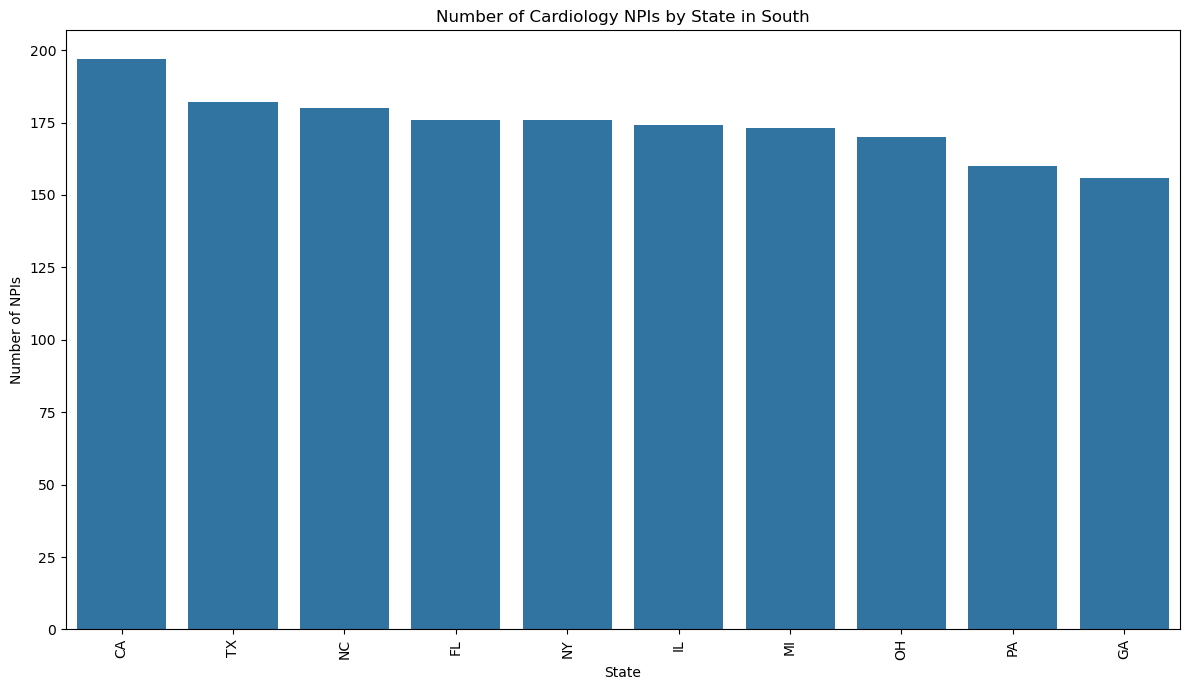

In [ ]:
# # Cell #27: State-wise NPIs in selected region (save as PNG)
# if region != "All_Regions":
#     spec_region_df = df.loc[(df['Speciality'] == speciality) & (df['Region'] == region)]
#     plt.figure(figsize=(12, 7))
#     state_counts = spec_region_df['State'].value_counts().sort_values(ascending=False)
#     sns.barplot(x=state_counts.index, y=state_counts.values)
#     plt.title(f'Number of {speciality} NPIs by State in {region}')
#     plt.xlabel('State')
#     plt.ylabel('Number of NPIs')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.savefig("npi_by_state_region.png", bbox_inches="tight")
#     plt.close()
#     visualization_files["npi_by_state_region"] = "npi_by_state_region.png"

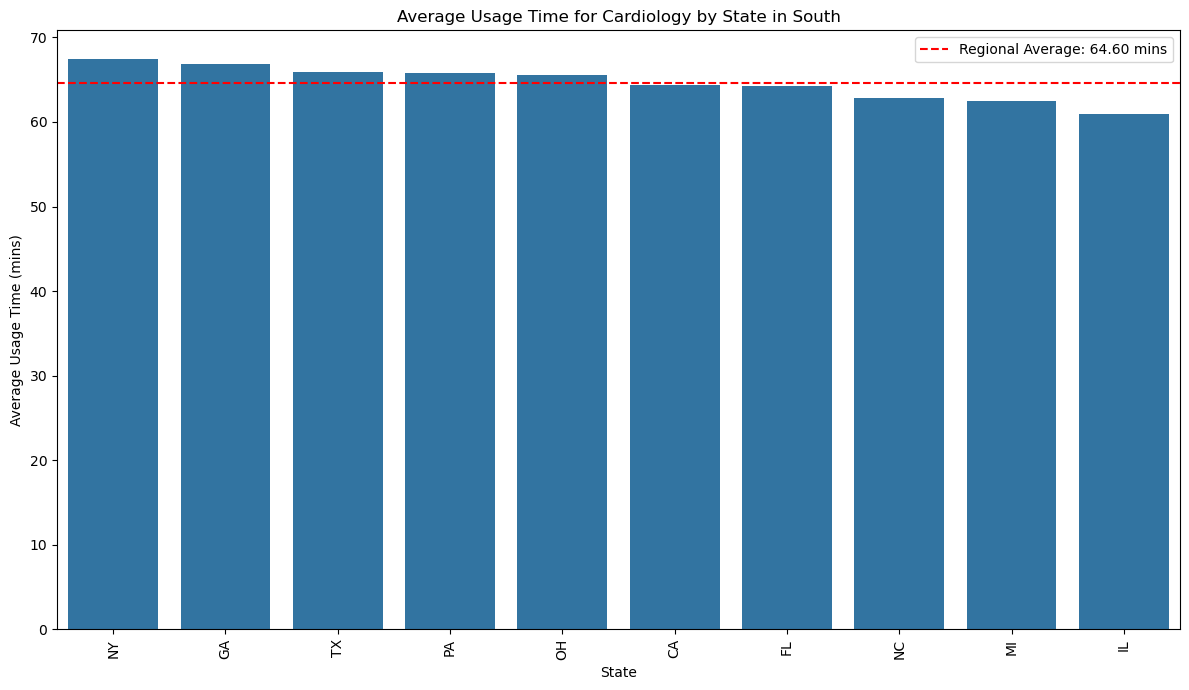

In [ ]:
# # Cell #28: Average usage time by state in region (save as PNG)
# if region != "All_Regions":
#     plt.figure(figsize=(12, 7))
#     avg_usage_by_state = spec_region_df.groupby('State')['Usage Time (mins)'].mean().sort_values(ascending=False)
#     sns.barplot(x=avg_usage_by_state.index, y=avg_usage_by_state.values)
#     plt.title(f'Average Usage Time for {speciality} by State in {region}')
#     plt.xlabel('State')
#     plt.ylabel('Average Usage Time (mins)')
#     plt.axhline(y=spec_region_df['Usage Time (mins)'].mean(), color='r', linestyle='--', label=f'Regional Average: {spec_region_df["Usage Time (mins)"].mean():.2f} mins')
#     plt.legend()
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.savefig("usage_by_state_region.png", bbox_inches="tight")
#     plt.close()
#     visualization_files["usage_by_state_region"] = "usage_by_state_region.png"

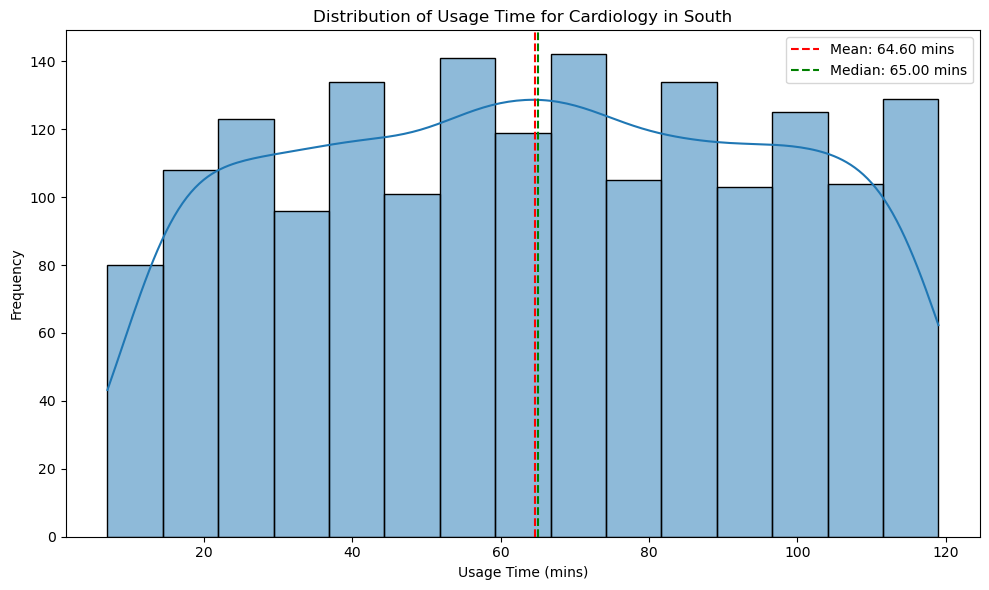

In [ ]:
# #29 Distribution of usage time for the specialty in the region
# plt.figure(figsize=(10, 6))
# sns.histplot(spec_region_df['Usage Time (mins)'], kde=True, bins=15)
# plt.title(f'Distribution of Usage Time for {speciality} in {region}')
# plt.xlabel('Usage Time (mins)')
# plt.ylabel('Frequency')
# plt.axvline(x=spec_region_df['Usage Time (mins)'].mean(), color='r', linestyle='--', 
#            label=f'Mean: {spec_region_df["Usage Time (mins)"].mean():.2f} mins')
# plt.axvline(x=spec_region_df['Usage Time (mins)'].median(), color='g', linestyle='--', 
#            label=f'Median: {spec_region_df["Usage Time (mins)"].median():.2f} mins')
# plt.legend()
# plt.tight_layout()
# plt.show()

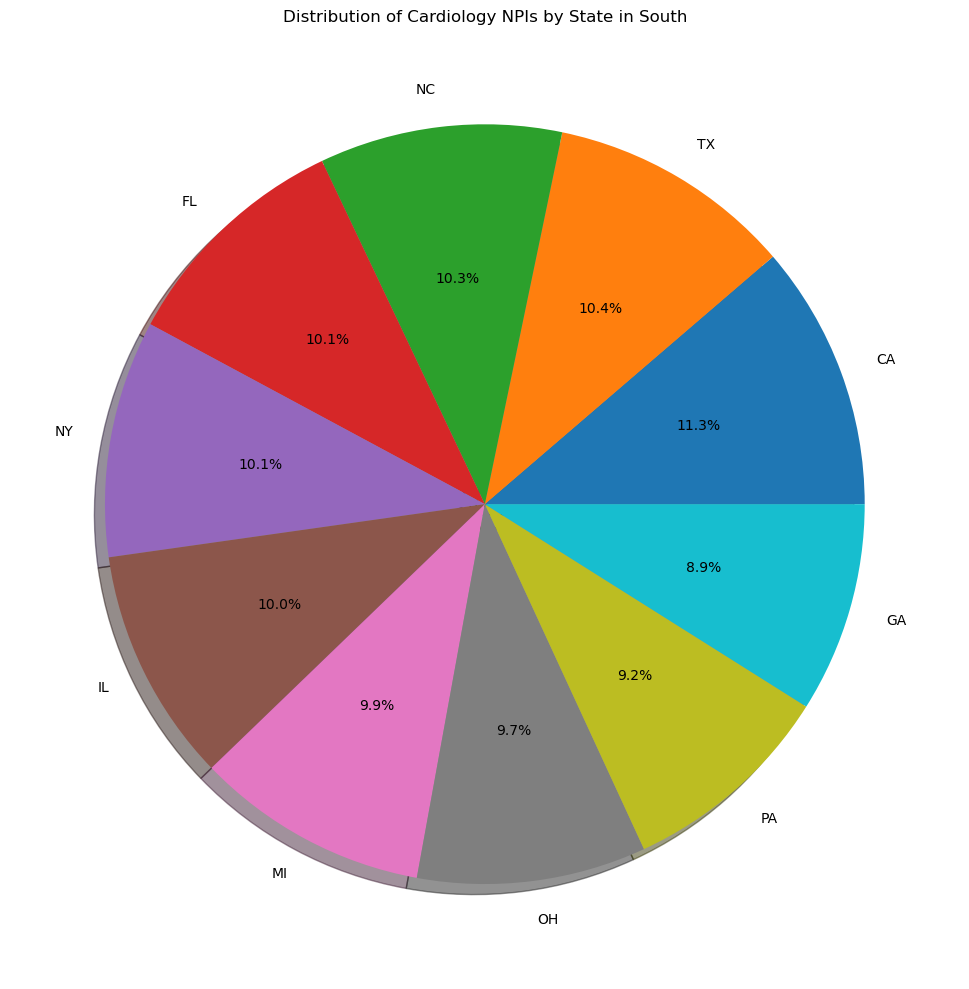

In [ ]:
# # Cell #30: Pie chart of states in region (save as PNG)
# if region != "All_Regions":
#     state_counts = spec_region_df['State'].value_counts().sort_values(ascending=False)
#     if len(state_counts) > 1:
#         plt.figure(figsize=(10, 10))
#         state_counts.plot(kind='pie', autopct='%1.1f%%', shadow=True)
#         plt.title(f'Distribution of {speciality} NPIs by State in {region}')
#         plt.ylabel('')
#         plt.tight_layout()
#         plt.savefig("state_pie_region.png", bbox_inches="tight")
#         plt.close()
#         visualization_files["state_pie_region"] = "state_pie_region.png"

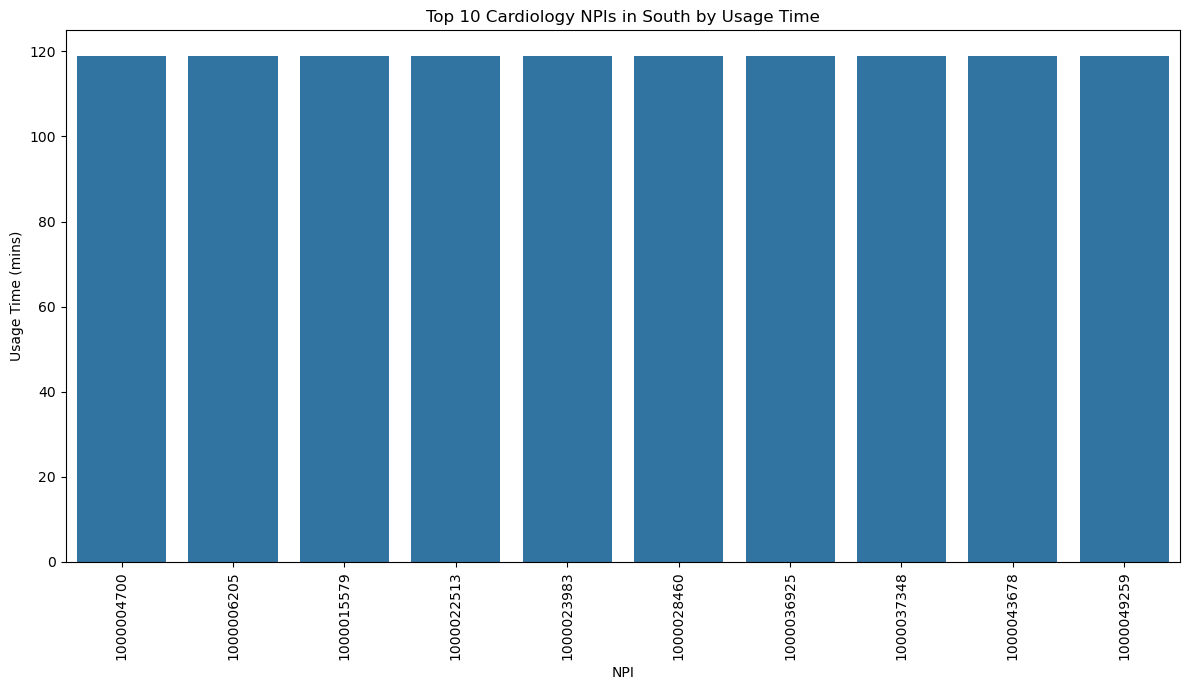

In [ ]:
# # Cell #31: Top NPIs by usage time in region (save as PNG)
# if region != "All_Regions" and len(spec_region_df) > 0:
#     top_npis = spec_region_df.sort_values('Usage Time (mins)', ascending=False).head(10)
#     plt.figure(figsize=(12, 7))
#     sns.barplot(x='NPI', y='Usage Time (mins)', data=top_npis)
#     plt.title(f'Top 10 {speciality} NPIs in {region} by Usage Time')
#     plt.xlabel('NPI')
#     plt.ylabel('Usage Time (mins)')
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.savefig("top_npis_region.png", bbox_inches="tight")
#     plt.close()
#     visualization_files["top_npis_region"] = "top_npis_region.png"

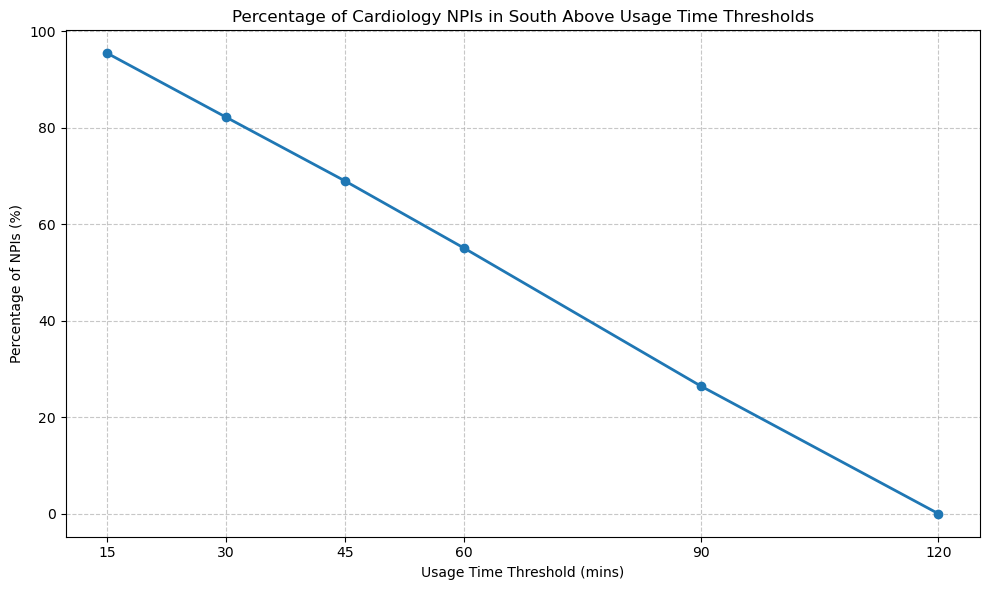

In [ ]:
# # Cell #32: Usage time threshold analysis (save as PNG)
# if region != "All_Regions":
#     thresholds = [15, 30, 45, 60, 90, 120]
#     percentages = []
#     for threshold in thresholds:
#         percent_above = (spec_region_df['Usage Time (mins)'] >= threshold).mean() * 100
#         percentages.append(percent_above)
#     plt.figure(figsize=(10, 6))
#     plt.plot(thresholds, percentages, marker='o', linestyle='-', linewidth=2)
#     plt.title(f'Percentage of {speciality} NPIs in {region} Above Usage Time Thresholds')
#     plt.xlabel('Usage Time Threshold (mins)')
#     plt.ylabel('Percentage of NPIs (%)')
#     plt.grid(True, linestyle='--', alpha=0.7)
#     plt.xticks(thresholds)
#     plt.tight_layout()
#     plt.savefig("usage_thresholds_region.png", bbox_inches="tight")
#     plt.close()
#     visualization_files["usage_thresholds_region"] = "usage_thresholds_region.png"

In [ ]:
# Cell #33: Visualization functions and execution
def visualize_npi_map(df, speciality=None, region=None):
    if speciality:
        filtered_df = df[df['Speciality'] == speciality]
        title_suffix = f" for {speciality} Specialty"
    else:
        filtered_df = df
        title_suffix = " Across All Specialties"
    
    region_mapping = {
        'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
        'Midwest': ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
        'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX'],
        'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
    }
    
    state_code_to_name = {k: v for k, v in zip(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC'], ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia'])}
    state_name_to_code = {v: k for k, v in state_code_to_name.items()}
    
    data_df = filtered_df.copy()
    if len(data_df) > 0 and len(data_df['State'].iloc[0]) > 2:
        data_df['StateCode'] = data_df['State'].map(lambda x: state_name_to_code.get(x, x))
    else:
        data_df['StateCode'] = data_df['State']
        data_df['StateName'] = data_df['State'].map(lambda x: state_code_to_name.get(x, x))
    
    def get_region(state_code):
        for r, states in region_mapping.items():
            if state_code in states:
                return r
        return "Unknown"
    
    data_df['Region'] = data_df['StateCode'].apply(get_region)
    
    if region and region in region_mapping:
        data_df = data_df[data_df['Region'] == region]
        title_suffix += f" in {region} Region"
    
    state_counts = data_df.groupby('StateCode').size().reset_index(name='NPI_Count')
    state_counts['name'] = state_counts['StateCode'].map(lambda x: state_code_to_name.get(x, x))
    state_counts['Region'] = state_counts['StateCode'].apply(get_region)
    
    scope = 'usa'
    
    fig = px.choropleth(
        state_counts,
        locations='StateCode',
        locationmode='USA-states',
        color='NPI_Count',
        scope=scope,
        hover_name='name',
        hover_data=['Region', 'NPI_Count'],
        title=f'Distribution of NPIs Across US States{title_suffix}',
        color_continuous_scale='YlGnBu',
        labels={'NPI_Count': 'Number of NPIs'}
    )
    
    fig.update_layout(
        geo=dict(showlakes=True, lakecolor='rgb(255, 255, 255)'),
        margin={"r":0, "t":50, "l":0, "b":0},
        height=600
    )
    
    region_counts = data_df.groupby('Region').size().reset_index(name='NPI_Count')
    total_npis = region_counts['NPI_Count'].sum()
    region_counts['Percentage'] = (region_counts['NPI_Count'] / total_npis * 100).round(1)
    
    if region and region in region_mapping:
        region_fig = px.bar(
            state_counts[state_counts['Region'] == region].sort_values('NPI_Count', ascending=False),
            x='name',
            y='NPI_Count',
            title=f'NPI Distribution by State in {region} Region{title_suffix}',
            labels={'NPI_Count': 'Number of NPIs', 'name': 'State'},
            color='NPI_Count',
            color_continuous_scale='YlGnBu'
        )
        region_fig.update_layout(height=400, xaxis={'categoryorder': 'total descending'})
    else:
        region_fig = px.bar(
            region_counts.sort_values('NPI_Count', ascending=False),
            x='Region',
            y='NPI_Count',
            text='Percentage',
            title=f'NPI Distribution by Region{title_suffix}',
            labels={'NPI_Count': 'Number of NPIs', 'Region': 'Region'},
            color='NPI_Count',
            color_continuous_scale='YlGnBu'
        )
        region_fig.update_traces(texttemplate='%{text}%', textposition='outside')
        region_fig.update_layout(height=400, xaxis={'categoryorder': 'total descending'})
    
    if region and region in region_mapping:
        pie_fig = px.pie(
            state_counts[state_counts['Region'] == region],
            values='NPI_Count',
            names='name',
            title=f'Percentage Distribution of NPIs by State in {region} Region{title_suffix}',
            color_discrete_sequence=px.colors.sequential.YlGnBu
        )
    else:
        pie_fig = px.pie(
            region_counts,
            values='NPI_Count',
            names='Region',
            title=f'Percentage Distribution of NPIs by Region{title_suffix}',
            color_discrete_sequence=px.colors.sequential.YlGnBu
        )
    
    pie_fig.update_traces(textinfo='percent+label+value', hole=.3)
    
    usage_fig = None
    if 'Usage Time (mins)' in data_df.columns:
        if region and region in region_mapping:
            usage_by_state = data_df.groupby(['StateCode', 'StateName'])['Usage Time (mins)'].mean().reset_index()
            usage_by_state['Usage Time (mins)'] = usage_by_state['Usage Time (mins)'].round(1)
            usage_fig = px.bar(
                usage_by_state.sort_values('Usage Time (mins)', ascending=False),
                x='StateName',
                y='Usage Time (mins)',
                title=f'Average Usage Time by State in {region} Region{title_suffix}',
                color='Usage Time (mins)',
                color_continuous_scale='YlGnBu'
            )
        else:
            usage_by_region = data_df.groupby('Region')['Usage Time (mins)'].mean().reset_index()
            usage_by_region['Usage Time (mins)'] = usage_by_region['Usage Time (mins)'].round(1)
            usage_fig = px.bar(
                usage_by_region.sort_values('Usage Time (mins)', ascending=False),
                x='Region',
                y='Usage Time (mins)',
                title=f'Average Usage Time by Region{title_suffix}',
                color='Usage Time (mins)',
                color_continuous_scale='YlGnBu'
            )
        usage_fig.update_layout(height=400, xaxis={'categoryorder': 'total descending'})
    
    # Save without encoding parameter
    fig.write_html("plots/choropleth_map.html", include_plotlyjs='cdn', full_html=False)
    region_fig.write_html("plots/region_bar.html", include_plotlyjs='cdn', full_html=False)
    pie_fig.write_html("plots/region_pie.html", include_plotlyjs='cdn', full_html=False)
    if usage_fig:
        usage_fig.write_html("plots/usage_bar.html", include_plotlyjs='cdn', full_html=False)
    
    return fig, region_fig, pie_fig, usage_fig, state_counts if region else region_counts

def create_state_heatmap(df, speciality=None, region=None):
    if speciality:
        filtered_df = df[df['Speciality'] == speciality]
        title_suffix = f" for {speciality} Specialty"
    else:
        filtered_df = df
        title_suffix = " Across All Specialties"
    
    region_mapping = {
        'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
        'Midwest': ['OH', 'MI', 'IN', 'IL', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
        'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX'],
        'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
    }
    
    state_code_to_name = {k: v for k, v in zip(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC'], ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia'])}
    
    data_df = filtered_df.copy()
    if len(data_df) > 0 and len(data_df['State'].iloc[0]) > 2:
        data_df['StateCode'] = data_df['State'].map(lambda x: state_name_to_code.get(x, x))
    else:
        data_df['StateCode'] = data_df['State']
    
    def get_region(state_code):
        for r, states in region_mapping.items():
            if state_code in states:
                return r
        return "Unknown"
    
    data_df['Region'] = data_df['StateCode'].apply(get_region)
    
    if region and region in region_mapping:
        data_df = data_df[data_df['Region'] == region]
        title_suffix += f" in {region} Region"
        
        region_states = [state for state in state_code_to_name.keys() if state in region_mapping.get(region, [])]
        region_states_df = pd.DataFrame({
            'State': region_states,
            'StateName': [state_code_to_name[s] for s in region_states],
            'NPI_Count': [0] * len(region_states)
        })
        all_states_df = region_states_df
    else:
        all_states_df = pd.DataFrame({
            'State': list(state_code_to_name.keys()),
            'StateName': list(state_code_to_name.values()),
            'NPI_Count': [0] * len(state_code_to_name)
        })
    
    actual_counts = data_df.groupby('StateCode').size().reset_index(name='Count')
    all_states_df = all_states_df.merge(actual_counts, left_on='State', right_on='StateCode', how='left').fillna(0)
    all_states_df['NPI_Count'] = all_states_df['Count']
    
    fig = px.choropleth(
        all_states_df,
        locations='State',
        locationmode='USA-states',
        color='NPI_Count',
        scope='usa',
        hover_name='StateName',
        hover_data=['NPI_Count'],
        title=f'NPI Distribution Map{title_suffix}',
        color_continuous_scale='YlGnBu',
        labels={'NPI_Count': 'Number of NPIs'}
    )
    
    fig.update_layout(
        geo=dict(showlakes=True, lakecolor='rgb(255, 255, 255)'),
        margin={"r":0, "t":50, "l":0, "b":0},
        height=600
    )
    
    # Save without encoding parameter
    fig.write_html("plots/state_heatmap.html", include_plotlyjs='cdn', full_html=False)
    
    return fig

def display_npi_visualizations(df, speciality=None, region=None):
    title_components = []
    if speciality:
        title_components.append(f"Speciality: {speciality}")
    if region and region != "All_Regions":
        title_components.append(f"Region: {region}")
    filter_title = " and ".join(title_components) or "All Data"
    
    choropleth_map, region_bar, region_pie, usage_bar, count_data = visualize_npi_map(df, speciality, region)
    state_heatmap = create_state_heatmap(df, speciality, region)
    
    count_data.to_csv("plots/npi_count_data.csv", index=False)
    
    return {
        "choropleth_map": "plots/choropleth_map.html",
        "region_bar": "plots/region_bar.html",
        "region_pie": "plots/region_pie.html",
        "usage_bar": "plots/usage_bar.html" if usage_bar else None,
        "state_heatmap": "plots/state_heatmap.html",
        "count_data": "plots/npi_count_data.csv"
    }

visualization_outputs = display_npi_visualizations(df, speciality=speciality, region=region if region != "All_Regions" else None)

# Save to pickle (moved from Cell #25 to here to include visualization_outputs)
with open("output.pkl", "wb") as f:
    pickle.dump((regions_df_list, region_names, region_wise_percent, visualization_files), f)